In [26]:
# Dependencies and Setup
#!pip install citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

In [3]:
# Create lists for variables from Weather API call
city_unique= []
lat= []
lng= []
max_temp= []
humidity= []
cloudiness= []
wind_speed= []
country= []
date= []
record_counter= 0
set_counter= 0

# Url for Weather API call
url= "http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=" + weather_api_key
print('Beginning Data Retrieval')
print('-----------------------------')
for city in cities:
    
    query_url= url + "&q=" + city
    response= requests.get(query_url).json()
    
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter= 0
    
    print(f" Processing Record {record_counter} of Set {set_counter} | {city}")
    
    try: 
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_unique.append(city)
    
    except:
        print("City not found. Skipping...")
        pass
        
print(f'---------------------------')
print(f'Data Retrieval Complete')
print(f'---------------------------')
        

Beginning Data Retrieval
-----------------------------
 Processing Record 1 of Set 0 | ponta do sol
 Processing Record 2 of Set 0 | eyl
 Processing Record 3 of Set 0 | busselton
 Processing Record 4 of Set 0 | taolanaro
City not found. Skipping...
 Processing Record 5 of Set 0 | northfield
 Processing Record 6 of Set 0 | samusu
City not found. Skipping...
 Processing Record 7 of Set 0 | albany
 Processing Record 8 of Set 0 | atuona
 Processing Record 9 of Set 0 | suixi
 Processing Record 10 of Set 0 | indian head
 Processing Record 11 of Set 0 | rikitea
 Processing Record 12 of Set 0 | punta arenas
 Processing Record 13 of Set 0 | katsuura
 Processing Record 14 of Set 0 | guerrero negro
 Processing Record 15 of Set 0 | bredasdorp
 Processing Record 16 of Set 0 | yellowknife
 Processing Record 17 of Set 0 | palmer
 Processing Record 18 of Set 0 | walvis bay
 Processing Record 19 of Set 0 | kashi
 Processing Record 20 of Set 0 | east london
 Processing Record 21 of Set 0 | lac du bonnet


 Processing Record 28 of Set 3 | poum
 Processing Record 29 of Set 3 | locri
 Processing Record 30 of Set 3 | itaocara
 Processing Record 31 of Set 3 | kuche
City not found. Skipping...
 Processing Record 32 of Set 3 | ternate
 Processing Record 33 of Set 3 | carutapera
 Processing Record 34 of Set 3 | pacific grove
 Processing Record 35 of Set 3 | agulu
 Processing Record 36 of Set 3 | esperance
 Processing Record 37 of Set 3 | kavieng
 Processing Record 38 of Set 3 | khatanga
 Processing Record 39 of Set 3 | waitati
 Processing Record 40 of Set 3 | namatanai
 Processing Record 41 of Set 3 | wlodawa
 Processing Record 42 of Set 3 | ribeira grande
 Processing Record 43 of Set 3 | lolua
City not found. Skipping...
 Processing Record 44 of Set 3 | aranos
 Processing Record 45 of Set 3 | vernon
 Processing Record 46 of Set 3 | avarua
 Processing Record 47 of Set 3 | koroni
 Processing Record 48 of Set 3 | watsa
 Processing Record 49 of Set 3 | san buenaventura
 Processing Record 50 of Set

 Processing Record 11 of Set 7 | amapa
 Processing Record 12 of Set 7 | navalgund
 Processing Record 13 of Set 7 | miram shah
 Processing Record 14 of Set 7 | porto novo
 Processing Record 15 of Set 7 | college
 Processing Record 16 of Set 7 | rzhaksa
 Processing Record 17 of Set 7 | chapais
 Processing Record 18 of Set 7 | staryy nadym
 Processing Record 19 of Set 7 | hatillo
 Processing Record 20 of Set 7 | srandakan
 Processing Record 21 of Set 7 | ulvik
 Processing Record 22 of Set 7 | tiksi
 Processing Record 23 of Set 7 | harper
 Processing Record 24 of Set 7 | egvekinot
 Processing Record 25 of Set 7 | sterling
 Processing Record 26 of Set 7 | naraina
 Processing Record 27 of Set 7 | gambela
 Processing Record 28 of Set 7 | aflu
City not found. Skipping...
 Processing Record 29 of Set 7 | yulara
 Processing Record 30 of Set 7 | ballina
 Processing Record 31 of Set 7 | kavaratti
 Processing Record 32 of Set 7 | sisimiut
 Processing Record 33 of Set 7 | ust-kamchatsk
City not foun

 Processing Record 44 of Set 10 | bundaberg
 Processing Record 45 of Set 10 | krasnoselkup
 Processing Record 46 of Set 10 | pavlodar
 Processing Record 47 of Set 10 | hami
 Processing Record 48 of Set 10 | makushino
 Processing Record 49 of Set 10 | donskoye
 Processing Record 50 of Set 10 | balkhash
 Processing Record 0 of Set 11 | point fortin
 Processing Record 1 of Set 11 | gondanglegi
 Processing Record 2 of Set 11 | husavik
 Processing Record 3 of Set 11 | opuwo
 Processing Record 4 of Set 11 | garissa
 Processing Record 5 of Set 11 | atasu
 Processing Record 6 of Set 11 | griffith
 Processing Record 7 of Set 11 | rajaldesar
 Processing Record 8 of Set 11 | angola
 Processing Record 9 of Set 11 | tidore
City not found. Skipping...
 Processing Record 10 of Set 11 | aasiaat
 Processing Record 11 of Set 11 | la brea
 Processing Record 12 of Set 11 | ihosy
 Processing Record 13 of Set 11 | thunder bay
 Processing Record 14 of Set 11 | safford
 Processing Record 15 of Set 11 | dunedi

In [21]:
weather_dict= {'City': city_unique,
              'Lat': lat,
              'Lng': lng,
              'Max Temp': max_temp,
              'Humidity': humidity,
              'Cloudiness': cloudiness,
              'Wind Speed': wind_speed,
              'Country': country,
              'Date': date
              }

weather_df= pd.DataFrame(weather_dict)
weather_df.to_csv(output_data_file, encoding="utf-8", index=False)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ponta do sol,32.67,-17.10,73.40,78,40,2.24,PT,1597870747
1,eyl,7.98,49.82,78.71,75,0,20.62,SO,1597870747
2,busselton,-33.65,115.33,41.00,79,81,1.05,AU,1597870637
3,northfield,44.46,-93.16,82.40,54,1,11.41,US,1597870749
4,albany,42.60,-73.97,73.99,42,17,7.31,US,1597870730


In [39]:
v= weather_df.loc[weather_df['Max Temp'] <30]
v

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [25]:
# Check to see if any cities have humidity greater than 100
high_humidity= weather_df.loc[weather_df['Humidity'] > 100 ]
#high_humidity
# No cities have humidity greater than 100

In [28]:
date =datetime.datetime.fromtimestamp(
        int(weather_df['Date'][0])
    ).strftime('%m/%d/%Y')

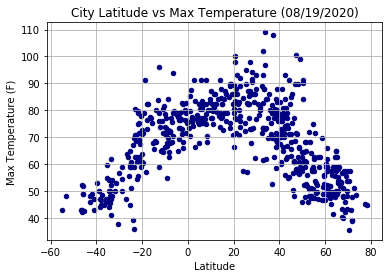

In [52]:
# Lat vs Temp plot
weather_df.plot(kind='scatter', x='Lat', y='Max Temp', color='navy')
plt.title(f'City Latitude vs. Max Temperature ({date})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()

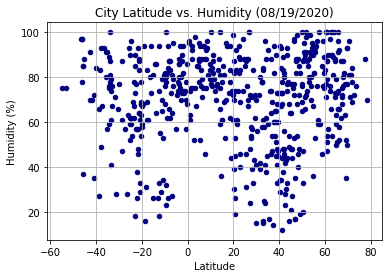

In [55]:
# Lat vs Humidity plot
weather_df.plot(kind='scatter', x='Lat', y='Humidity', color='navy')
plt.title(f'City Latitude vs. Humidity ({date})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

In [ ]:
# Lat vs Cloudiness plot
weather_df.plot(kind='scatter', x='Lat', y='Humid', color='navy')
plt.title(f'City Latitude vs. Humidity ({date})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

In [ ]:
# Lat vs Wind Speed plot
weather_df.plot(kind='scatter', x='Lat', y='Humidity', color='navy')
plt.title(f'City Latitude vs. Humidity ({date})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()